# **Assignment 10**

In [1]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets here once and assign to variables iris and boston

#iris = pd.DataFrame(ds.load_iris().data)
iris_complete = ds.load_iris(return_X_y=False, as_frame=True)
iris = iris_complete.data

In [3]:
# For iris, there was an option to pull as a Dataframe. We can check it
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [4]:
# We will no add the target column
iris["target"] = iris_complete.target

In [5]:
iris_complete.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# We will change the feature (column names) to something simpler
iris.columns=['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class']
d = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris['species'] = iris['class'].map(d)
iris.head()

,sepal_len,sepal_width,petal_len,petal_width,class,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
# Now we will separate into data, target and target labels

iris_X = iris.drop(["class","species"], axis=1)
iris_y = iris["class"].values
iris_y_labels = iris["species"]

# iris Dataframe
print(iris.head())

#iris columns, except target columns
print(iris_X.head())

#iris target columns
print(iris_y)

#Just labels for target
print(iris_y_labels)

   sepal_len  sepal_width  petal_len  petal_width  class species
0        5.1          3.5        1.4          0.2      0  setosa
1        4.9          3.0        1.4          0.2      0  setosa
2        4.7          3.2        1.3          0.2      0  setosa
3        4.6          3.1        1.5          0.2      0  setosa
4        5.0          3.6        1.4          0.2      0  setosa
   sepal_len  sepal_width  petal_len  petal_width
0        5.1          3.5        1.4          0.2
1        4.9          3.0        1.4          0.2
2        4.7          3.2        1.3          0.2
3        4.6          3.1        1.5          0.2
4        5.0          3.6        1.4          0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0   

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [8]:
knn = KNN(n_neighbors = 5)
knn.fit(iris_X,iris_y)
pred = knn.predict(iris_X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
pred_labels= pd.DataFrame(pred)[0].map(d)
pred_labels

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: 0, Length: 150, dtype: object

**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [10]:
X_train, X_test, y_train, y_test = tts(iris_X,iris_y, test_size=0.3, random_state=123)

kkn = KNN(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
metrics.accuracy_score(pred, y_test)


0.9777777777777777

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

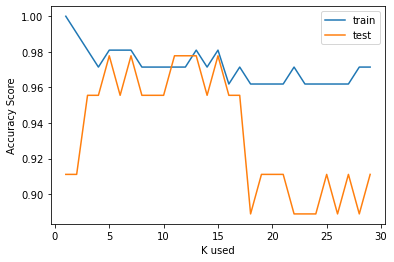

In [11]:
neighbors = range(1,30)

test_accuracies = {}
train_accuracies = {}

for neighbor in neighbors:
    knn=KNN(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_train)
    train_accuracies[neighbor] = metrics.accuracy_score(preds,y_train)
#    train_accuracies[neighbor] = knn.score(X_train,y_train)
    test_accuracies[neighbor] = knn.score(X_test,y_test)

plt.plot(neighbors, train_accuracies.values())
plt.plot(neighbors, test_accuracies.values())
plt.legend(["train","test"])
plt.xlabel("K used")
plt.ylabel("Accuracy Score")

plt.show()

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [12]:
# We will start with Boston. The return values will be a Numpy array so we will convert ot Pandas datframe
boston_complete = ds.load_boston(return_X_y=False)

# This will only pull the data columns (not the target column)
boston = pd.DataFrame(boston_complete.data)

D:\ComputerCode\JF_Environments\deeplearning-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

In [13]:
#Here we pull the target column and add it to boston df
boston["MEDV"] = boston_complete.target

In [14]:
boston_complete.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [15]:
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
#Here we name all columns
features = boston_complete.feature_names
features = np.append(features,"MEDV")
boston.columns= features

In [17]:
#Let's check our work
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
# Now we will separate into values and targets
boston_X = boston.drop("MEDV",axis=1)
boston_y = boston["MEDV"]

In [19]:
avg_Age = np.mean(boston_X["AGE"])
avg_MEDV = np.mean(boston_y)

print("Average age {}".format(avg_Age))
print("Average MEDV {}".format(avg_MEDV))



Average age 68.57490118577076
Average MEDV 22.532806324110677


**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

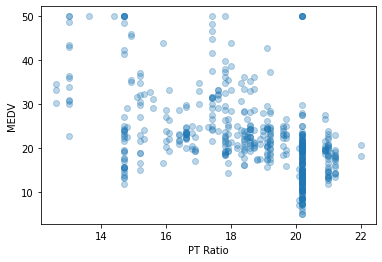

In [20]:
plt.scatter(boston_X["PTRATIO"],boston_y, alpha=0.3)
plt.xlabel("PT Ratio")
plt.ylabel("MEDV")

plt.show()

In [21]:
boston_X["PTRATIO"].values

array([15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15.2,
       15.2, 15.2, 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. ,
       21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. ,
       21. , 21. , 19.2, 19.2, 19.2, 19.2, 18.3, 18.3, 17.9, 17.9, 17.9,
       17.9, 17.9, 17.9, 17.9, 17.9, 17.9, 16.8, 16.8, 16.8, 16.8, 21.1,
       17.9, 17.3, 15.1, 19.7, 19.7, 19.7, 19.7, 19.7, 19.7, 18.6, 16.1,
       16.1, 18.9, 18.9, 18.9, 19.2, 19.2, 19.2, 19.2, 18.7, 18.7, 18.7,
       18.7, 18.7, 18.7, 19. , 19. , 19. , 19. , 18.5, 18.5, 18.5, 18.5,
       17.8, 17.8, 17.8, 17.8, 18.2, 18.2, 18.2, 18. , 18. , 18. , 18. ,
       18. , 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9,
       20.9, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 19.1,
       19.1, 19.1, 19.1, 19.1, 19.1, 19.1, 21.2, 21.2, 21.2, 21.2, 21.2,
       21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 14.7,
       14.7, 14.7, 14.7, 14.7, 14.7, 14.7, 14.7, 14

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

In [22]:
reg = lm.LinearRegression()
reg.fit(boston_X["PTRATIO"].values.reshape(-1,1), boston_y)

LinearRegression()

In [23]:
exes = np.linspace(np.min(boston_X["PTRATIO"]), np.max(boston_X["PTRATIO"]))
exes

array([12.6       , 12.79183673, 12.98367347, 13.1755102 , 13.36734694,
       13.55918367, 13.75102041, 13.94285714, 14.13469388, 14.32653061,
       14.51836735, 14.71020408, 14.90204082, 15.09387755, 15.28571429,
       15.47755102, 15.66938776, 15.86122449, 16.05306122, 16.24489796,
       16.43673469, 16.62857143, 16.82040816, 17.0122449 , 17.20408163,
       17.39591837, 17.5877551 , 17.77959184, 17.97142857, 18.16326531,
       18.35510204, 18.54693878, 18.73877551, 18.93061224, 19.12244898,
       19.31428571, 19.50612245, 19.69795918, 19.88979592, 20.08163265,
       20.27346939, 20.46530612, 20.65714286, 20.84897959, 21.04081633,
       21.23265306, 21.4244898 , 21.61632653, 21.80816327, 22.        ])

In [24]:
preds = reg.predict(exes.reshape(-1,1))

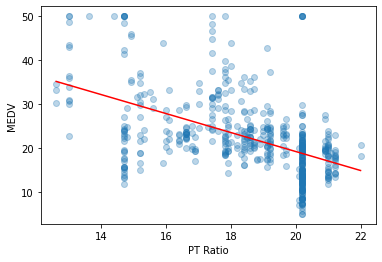

In [25]:
plt.scatter(boston_X["PTRATIO"],boston_y, alpha=0.3)
plt.plot(exes,preds, color="red")
plt.xlabel("PT Ratio")
plt.ylabel("MEDV")
plt.show()